In [1]:
import datetime

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import plotly
import pandas as pd
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px

from category_encoders import TargetEncoder
import scipy
from scipy.stats import normaltest
import seaborn as sns
import sklearn
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate,learning_curve, train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error,  mean_absolute_percentage_error, r2_score
#from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import linear_model

from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import sys

import time
#%matplotlib inline

import lightgbm as lgb
from sklearn import set_config
import warnings
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from category_encoders import *
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import AdaBoostRegressor

import shap

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
sns.set(style="whitegrid")

/Users/bahia/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning:

You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.



In [2]:
#Chargement des données nettoyées
data2 = pd.read_csv("building_energy_cleaned.csv")
data2.head()
data2.shape

(1633, 43)

In [3]:
data2.describe()

,Unnamed: 0,OSEBuildingID,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SourceEUI(kBtu/sf),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,BuildingAge,most_use_steam,most_use_natural,most_use_electric,use_stream,use_electricity,use_natural,percent_steam,percent_natural,percent_electricity,LargestPropertyUseTypeGFA_rate,SecondLargestPropertyUseTypeGFA_rate,ThirdLargestPropertyUseTypeGFA_rate,PropertyGFABuilding(s)_rate,PropertyGFAParking_rate,GFAPerBuilding,GFAPerFloor,NumberOfAllUseTypes,TotalGHGEmissionsLog,SiteEnergyUse(kBtu)Log
count,1633.00000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1.633000e+03,1082.000000,1633.000000,1.633000e+03,1.633000e+03,1.633000e+03,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1631.000000,1631.000000,1631.000000,1629.000000,1633.000000,1633.000000,1633.000000,1633.000000,1.633000e+03,1633.000,1633.000000,1633.000000,1633.000000
mean,816.00000,16378.946724,47.616073,-122.332881,1.201470,4.154317,1.191986e+05,65.158965,178.075505,5.229307e+05,5.911379e+06,2.000854e+06,1.632554,53.971219,0.014697,0.245560,0.738518,0.069810,0.998163,0.721372,2.159579,28.070576,69.769845,86.905623,12.404770,2.209100,93.786926,6.213074,1.076542e+05,inf,25.314146,1.747538,6.485044
std,471.55081,13802.461636,0.048185,0.024499,2.951893,6.625352,2.986863e+05,28.369843,184.393952,5.568926e+06,2.096914e+07,9.461064e+06,2.352201,32.683228,0.120373,0.430551,0.439576,0.254905,0.042835,0.448462,9.248793,26.393241,26.205669,30.723538,17.181598,6.232493,14.112650,14.112650,1.836394e+05,NaN,20.556978,0.623243,0.582438
min,0.00000,1.000000,47.499170,-122.411820,1.000000,0.000000,1.128500e+04,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.650000,0.000000,0.000000,10.500000,0.000000,4.300000e+03,221.697,5.000000,0.000000,0.000000
25%,408.00000,586.000000,47.585280,-122.343180,1.000000,1.000000,2.940000e+04,48.000000,78.699997,0.000000e+00,7.412870e+05,0.000000e+00,0.360000,27.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,48.620163,69.080000,0.000000,0.000000,100.000000,0.000000,2.880000e+04,13292.550,12.000000,1.340444,6.103277
50%,816.00000,21172.000000,47.612400,-122.332890,1.000000,2.000000,4.924300e+04,73.000000,132.399994,0.000000e+00,1.640689e+06,5.161970e+05,0.890000,50.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,24.656174,69.649435,96.110000,0.000000,0.000000,100.000000,0.000000,4.769900e+04,22913.528,20.000000,1.710287,6.418150
75%,1224.00000,24602.000000,47.649750,-122.321800,1.000000,4.000000,1.060000e+05,89.000000,205.300003,0.000000e+00,4.967236e+06,1.529064e+06,1.910000,86.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,49.695059,99.935035,100.000000,23.820000,0.000000,100.000000,0.000000,1.007340e+05,38210.000,33.000000,2.163728,6.844088
max,1632.00000,50226.000000,47.733870,-122.258640,111.000000,99.000000,9.320156e+06,100.000000,2620.000000,1.349435e+08,6.570744e+08,2.979090e+08,34.090000,116.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,76.698765,100.000000,100.000000,642.680000,145.210000,92.910000,100.000000,89.500000,2.200000e+06,inf,255.000000,4.227166,8.941474


In [4]:
if 'Unnamed: 0' in data2.columns:
    data2.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data2[(data2.GFAPerBuilding == np.inf) | (data2.GFAPerFloor == np.inf)].head()
data2['GFAPerFloor'] = np.where(((data2.GFAPerFloor == np.inf) & (data2.NumberofFloors == 0)),0, data2.GFAPerFloor)

### Séléction des features à inclure dans les modelisations

In [6]:
data = data2[[ "NumberofFloors",  "BuildingAge" ,"NumberofBuildings",
                 "percent_electricity",
              "LargestPropertyUseTypeGFA_rate","SecondLargestPropertyUseTypeGFA_rate" ,"ThirdLargestPropertyUseTypeGFA_rate",  
              "PropertyGFAParking_rate",
              'TotalGHGEmissionsLog',  "PrimaryPropertyType",
             "Neighborhood" ,"NumberOfAllUseTypes",'GFAPerBuilding','GFAPerFloor',
             'LargestPropertyUseType',"SecondLargestPropertyUseType", "ThirdLargestPropertyUseType"]]


In [7]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   NumberofFloors                        1633 non-null   int64  
 1   BuildingAge                           1633 non-null   int64  
 2   NumberofBuildings                     1633 non-null   float64
 3   percent_electricity                   1631 non-null   float64
 4   LargestPropertyUseTypeGFA_rate        1629 non-null   float64
 5   SecondLargestPropertyUseTypeGFA_rate  1633 non-null   float64
 6   ThirdLargestPropertyUseTypeGFA_rate   1633 non-null   float64
 7   PropertyGFAParking_rate               1633 non-null   float64
 8   TotalGHGEmissionsLog                  1633 non-null   float64
 9   PrimaryPropertyType                   1633 non-null   object 
 10  Neighborhood                          1633 non-null   object 
 11  NumberOfAllUseTyp

None

In [8]:
# Fonction pour afficher une heatmap des carrélations entre les variables
def display_corr(data):
    numeric_data = data.select_dtypes(include=['number', 'bool'])

    # Compute correlation
    corr = round(numeric_data.corr(),2)

    display(corr)
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(7, 6))


    sns.heatmap(corr, mask=mask, cmap="coolwarm",annot= True, fmt = ".2f", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

,NumberofFloors,BuildingAge,NumberofBuildings,percent_electricity,LargestPropertyUseTypeGFA_rate,SecondLargestPropertyUseTypeGFA_rate,ThirdLargestPropertyUseTypeGFA_rate,PropertyGFAParking_rate,TotalGHGEmissionsLog,NumberOfAllUseTypes,GFAPerBuilding,GFAPerFloor
NumberofFloors,1.00,-0.10,-0.02,0.16,-0.07,0.09,0.03,0.19,0.30,0.04,0.68,-0.09
BuildingAge,-0.10,1.00,0.03,-0.17,0.00,-0.08,0.04,-0.34,-0.15,-0.00,-0.21,-0.12
NumberofBuildings,-0.02,0.03,1.00,0.00,0.04,-0.02,-0.01,-0.02,0.15,-0.00,-0.02,0.09
percent_electricity,0.16,-0.17,0.00,1.00,-0.09,0.11,0.04,0.21,-0.44,-0.01,0.16,-0.02
LargestPropertyUseTypeGFA_rate,-0.07,0.00,0.04,-0.09,1.00,-0.41,-0.33,-0.27,-0.03,-0.33,-0.11,0.01
SecondLargestPropertyUseTypeGFA_rate,0.09,-0.08,-0.02,0.11,-0.41,1.00,0.42,0.25,0.10,0.39,0.14,0.00
ThirdLargestPropertyUseTypeGFA_rate,0.03,0.04,-0.01,0.04,-0.33,0.42,1.00,0.06,0.07,0.52,0.06,0.01
PropertyGFAParking_rate,0.19,-0.34,-0.02,0.21,-0.27,0.25,0.06,1.00,0.14,0.01,0.24,0.02
TotalGHGEmissionsLog,0.30,-0.15,0.15,-0.44,-0.03,0.10,0.07,0.14,1.00,0.09,0.45,0.29
NumberOfAllUseTypes,0.04,-0.00,-0.00,-0.01,-0.33,0.39,0.52,0.01,0.09,1.00,0.11,0.06


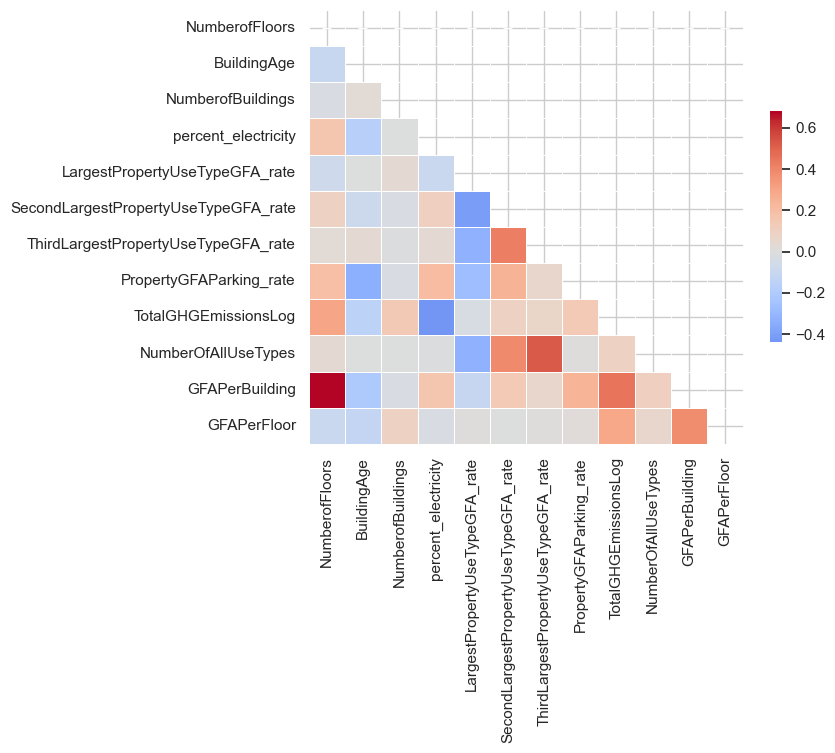

In [9]:
display_corr(data)

Sur cette heatmap on peut constater que la corrélation la plus forte est entre GFA Per Building (0,68).
ce qui suggère une relation positive significative entre la surface GFA par bâtiment et le nombre d'etage,

In [10]:
model_data = data

# Pipeline

Nous voulons effectuer quelques étapes essentielles pour préparer les données en vue de l'entraînement des modèles.
 Il faut supprimer les valeurs manquantes,  séparer les caractéristiques de la variable cible, et appliquer des transformations adaptées aux différents types de données. L'objectif est de garantir que les données sont prêtes pour être utilisées efficacement lors de l'entraînement du modèle.

In [11]:


#Les variables numériques et catégorielles doivent etre standardisées et encodées.


model_data.dropna(how = 'any', inplace=True)
X = model_data.drop(['TotalGHGEmissionsLog'],axis=1) #TotalGHGEmissions
y = model_data['TotalGHGEmissionsLog']


# Check for NaN

col_int =  list(X.columns[X.dtypes == 'int64' ])
col_float = list(X.columns[X.dtypes == 'float64'])
col_cate = list(X.columns[X.dtypes == 'object'])

col_num_tr = Pipeline(steps = [
   ("imputer", SimpleImputer(strategy="mean")),('scaler', StandardScaler())])

col_cate_tr = Pipeline(steps = [
   ("encoder", OneHotEncoder(handle_unknown="ignore"))])



preprocessor = ColumnTransformer(
   transformers=[
       ('numeric',  col_num_tr, col_int + col_float),
       ('cat', col_cate_tr, col_cate)], remainder='passthrough')

preprocessor.fit_transform(X)
preprocessor


ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['NumberofFloors', 'BuildingAge',
                                  'NumberOfAllUseTypes', 'NumberofBuildings',
                                  'percent_electricity',
                                  'LargestPropertyUseTypeGFA_rate',
                                  'SecondLargestPropertyUseTypeGFA_rate',
                                  'ThirdLargestPropertyUseTypeGFA_rate',
                                  'PropertyGFAParking_rate', 'GFAPerBuilding',
                                  'GFAPerFloor']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['PrimaryPropertyType', 'Neighborhood',
                                  'LargestPropertyUseType',
                                  'SecondLargestPropertyUseType',
                                  'ThirdLargestPropertyUseType'])])

## Les differents algorithmes qui serons utilisés
Regression linéaire:  
RandomForest: RandomForest est un algorithme d'apprentissage ensembliste basé sur la création d'un grand nombre de n abres de decision.  
AdaBoost: AdaBoost est un algorithme d'apprentissage ensembliste qui ajuste séquentiellement plusieurs modèles faibles pour améliorer les performances globales du modèle
LightGBM: LightGBM est un algorithme de gradient boosting qui utilise des méthodes d'optimisation de l'arbre de décision pour améliorer l'efficacité et la précision de la prédiction.  
DummyRegressor: 

## Les metriques utilisés
R2 (Coefficient de détermination) :
Le coefficient de détermination R2 mesure la proportion de la variance de la variable dépendante qui est expliquée par le modèle.

RMSE (Root Mean Squared Error) :
Le RMSE mesure l'écart quadratique moyen entre les valeurs prédites par le modèle et les valeurs réelles.
Il donne une indication de la précision du modèle en termes d'erreur moyenne.
Comme le RMSE est exprimé dans les mêmes unités que la variable cible, il est facilement interprétable.

MAE (Mean Absolute Error) :
Le MAE mesure la moyenne des valeurs absolues des écarts entre les prédictions du modèle et les valeurs réelles.
Il est robuste aux valeurs aberrantes car il ne prend pas en compte les écarts quadratiques.

Temps d'exécution (Fit Time et Score Time) :
Fit Time représente le temps nécessaire pour entraîner le modèle, tandis que Score Time représente le temps nécessaire pour prédire les valeurs sur de nouvelles données.

In [12]:
linear = Pipeline(steps=[('prepa',preprocessor),('linear',linear_model.LinearRegression())])
forest = Pipeline(steps=[('prepa',preprocessor),('forest',RandomForestRegressor(random_state=0))])
Ada = Pipeline(steps=[('prepa',preprocessor),('ADA',AdaBoostRegressor(random_state=0))])
Lgbm = Pipeline(steps=[('prepa',preprocessor),('Lgbm',lgb.LGBMRegressor())])
#Svr = Pipeline(steps=[('prepa',preprocessor),('Svr',SVR(kernel='linear'))])
dum = Pipeline(steps=[('prepa',preprocessor),('dum',DummyRegressor())])

In [13]:
#Séparation du jeux de donée en Train et Test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)
#Lgbm.fit(X_train, y_train)

print('Nombres de lignes dans Train set: ', X_train.shape)
print('Nombres de lignes dans Test set: ', X_test.shape)
display(X.info())
#print("model score: %.3f" % forest.score(X_test, y_test))

Nombres de lignes dans Train set:  (1301, 16)
Nombres de lignes dans Test set:  (326, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 1627 entries, 0 to 1632
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   NumberofFloors                        1627 non-null   int64  
 1   BuildingAge                           1627 non-null   int64  
 2   NumberofBuildings                     1627 non-null   float64
 3   percent_electricity                   1627 non-null   float64
 4   LargestPropertyUseTypeGFA_rate        1627 non-null   float64
 5   SecondLargestPropertyUseTypeGFA_rate  1627 non-null   float64
 6   ThirdLargestPropertyUseTypeGFA_rate   1627 non-null   float64
 7   PropertyGFAParking_rate               1627 non-null   float64
 8   PrimaryPropertyType                   1627 non-null   object 
 9   Neighborhood                          1627 non-null   object 
 10 

None

# Evaluation des models avec les parametre par defauts

In [14]:

def evaluate_model(model, nom_model, X, y, pipelines, cv=9):
   
    # Effectuer la validation croisée
    score = cross_validate(model, X, y, cv=cv,
                           scoring=('neg_root_mean_squared_error', 'r2', 'neg_mean_absolute_error'),
                           return_train_score=True)

    # Calculer les métriques moyennes
    rmse_train = -score['train_neg_root_mean_squared_error'].mean()
    rmse_test = -score['test_neg_root_mean_squared_error'].mean()
    r2_train = score['train_r2'].mean()
    r2_test = score['test_r2'].mean()
    absolute_test = -score['test_neg_mean_absolute_error'].mean()
    fit_time_test = score['fit_time'].mean()
    score_time_test = score['score_time'].mean()

    # Créer un DataFrame avec les résultats
    resultat_df = pd.DataFrame({
        'RMSE Train': [rmse_train],
        'RMSE Test': [rmse_test],
        'R2 Train': [r2_train],
        'R2 Test': [r2_test],
        'MAE Test': [absolute_test],
        'Fit Time Test': [fit_time_test],
        'Score Time Test': [score_time_test]
    })

    return resultat_df


In [15]:
def evaluate_models(models, X, y):
    # Dictionnaire pour stocker les résultats
    results = {}

    # Parcours de chaque modèle
    for name, model in models.items():
        # Effectuer une validation croisée
        metrics = ['neg_root_mean_squared_error', 'r2', 'neg_mean_absolute_error']
        scores = cross_validate(model, X, y, cv=10, scoring=metrics, return_train_score=True)

        # Stocker les résultats
        results[name] = {
            'RMSE Train': -scores['train_neg_root_mean_squared_error'].mean(),
            'RMSE Test': -scores['test_neg_root_mean_squared_error'].mean(),
            'R2 Train': scores['train_r2'].mean(),
            'R2 Test': scores['test_r2'].mean(),
            'Absolute': -scores['train_neg_mean_absolute_error'].mean(),
            'Fit Time': scores['fit_time'].mean(),
            'Score Time': scores['score_time'].mean()
        }

    # Créer un DataFrame à partir des résultats
    result_df = pd.DataFrame(results).T

    # Renommer les index du DataFrame
    result_df.index = models.keys()

    return result_df

In [16]:
models = {'linear': linear, 'forest': forest, 'adaboost': Ada, 'Lgbm':Lgbm,"dum": dum}
result_df = evaluate_models(models, X, y)
display(result_df)

,RMSE Train,RMSE Test,R2 Train,R2 Test,Absolute,Fit Time,Score Time
linear,0.306177,0.376878,0.756012,0.529460,0.231917,0.032842,0.004225
forest,0.105631,0.288104,0.970947,0.729369,0.077577,2.277566,0.010815
adaboost,0.307703,0.336234,0.753578,0.631228,0.250427,0.193204,0.009771
Lgbm,0.124905,0.276879,0.959376,0.750455,0.092687,0.148662,0.005588
dum,0.620142,0.629835,0.000000,-0.302340,0.488475,0.008213,0.003829


### Visualisation des resultats

In [17]:
def graph_melted(melted_baseline):
    melted_baseline = melted_baseline.rename(columns={'index': 'Model'})    
    #display(melted_baseline)
# graphique

    plt.figure(figsize=(5, 4))

    sns.barplot(x='Model', y='Value', hue='Metric', data=melted_baseline, palette='muted', dodge=True, width=0.2)

    plt.title('Comparaison des modèles  - Metric')
    plt.xlabel('Modèle')
    plt.ylabel('Résultat')
    plt.legend(title='Metric')

    plt.show()

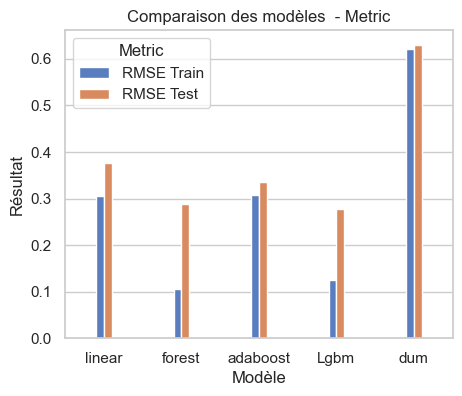

In [18]:

# Melt DataFrame pour regrouper les colonnes 'Score Time' et 'RMSE' en une seule colonne
melted_baseline = pd.melt(result_df.reset_index(), id_vars='index', value_vars=['RMSE Train', 'RMSE Test'],
                          var_name='Metric', value_name='Value')
graph_melted(melted_baseline)

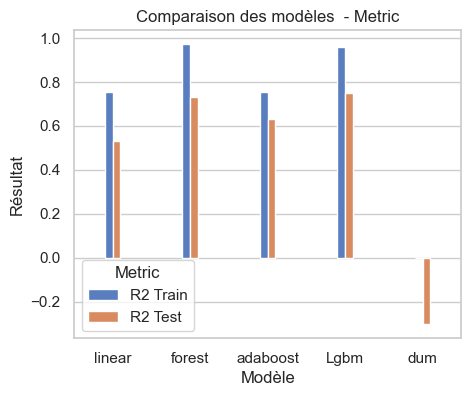

In [19]:
# Melt DataFrame pour regrouper les colonnes 'Score Time' et 'RMSE' en une seule colonne
melted_baseline = pd.melt(result_df.reset_index(), id_vars='index', value_vars=['R2 Train', 'R2 Test'],
                          var_name='Metric', value_name='Value')

graph_melted(melted_baseline)

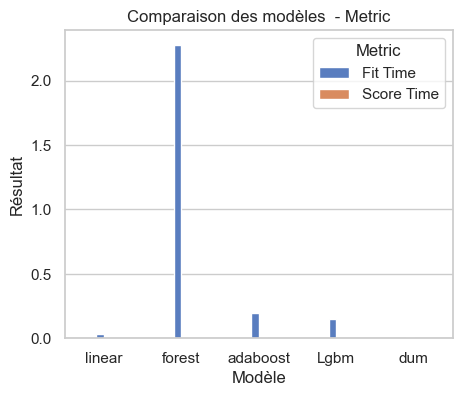

In [20]:
# Melt DataFrame pour regrouper les colonnes 'Score Time' et 'RMSE' en une seule colonne
melted_baseline = pd.melt(result_df.reset_index(), id_vars='index', value_vars=['Fit Time', 'Score Time'],
                          var_name='Metric', value_name='Value')
graph_melted(melted_baseline)

Le modèle Random Forest semble avoir les performances les plus élevées en termes de RMSE et de R2 sur l'ensemble de test mais le temps d'ajustement relativement lent.  
Le modèle Dummy montre des performances relativement faibles, ce qui est attendu pour un modèle simplifié.  
LightGBM montre également de bonnes performances avec un temps d'ajustement rapide.  
Le modèle linéaire et AdaBoost présentent des performances modérées

/Users/bahia/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/Users/bahia/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/Users/bahia/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or instal

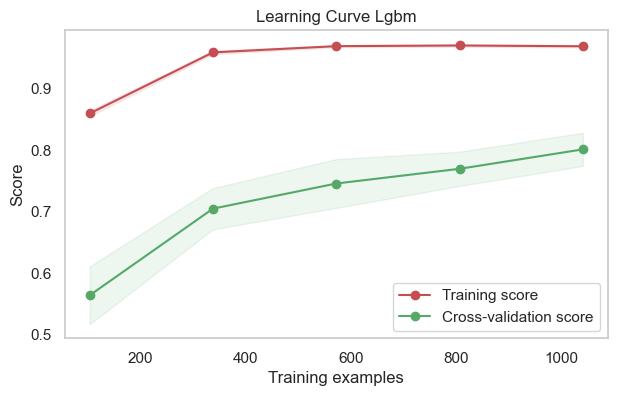

In [21]:
# Graphique courbe d'apprentissage

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure(figsize=(7, 4))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plot_learning_curve(Lgbm, "Learning Curve Lgbm", X_train, y_train, cv=5)

plt.show()


# Hyperparametres


### regression lineaire
fit_intercept : C'est un booléen qui décide si un terme constant (également appelé biais ou intercept) doit être ajusté. Si True, le modèle ajustera un terme constant à la matrice de conception X. Si False, aucun terme constant ne sera ajusté. Par défaut, il est défini sur True.

,RMSE Train,RMSE Test,R2 Train,R2 Test,MAE Test,Fit Time Test,Score Time Test
0,0.305645,0.383392,0.756728,0.52204,0.288613,0.034284,0.004358


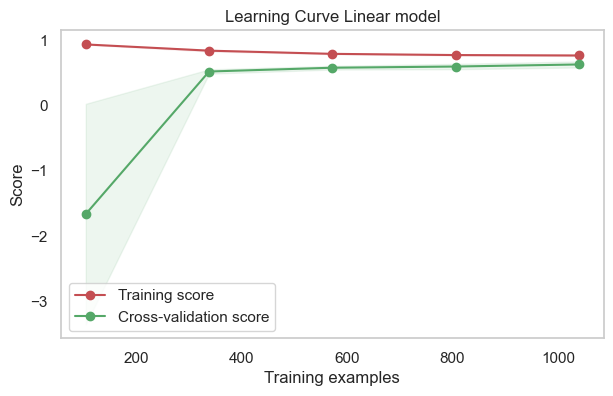

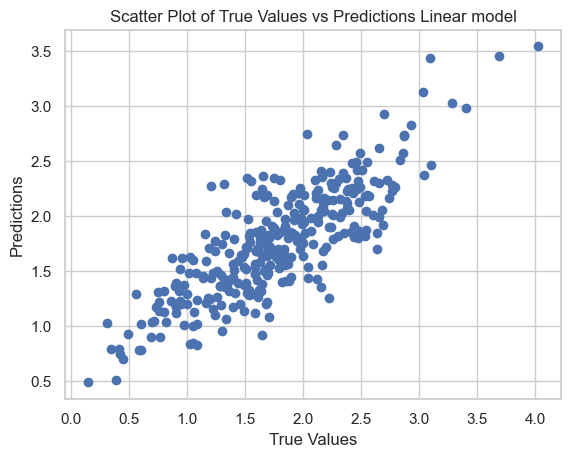

In [22]:
linear_model = Pipeline([
    ('prepa', preprocessor),
    ('linear', linear_model.LinearRegression())
])
linear_model.fit(X_train, y_train)
predictions = linear_model.predict(X_test)
pipelines = {}


result_linear = evaluate_model(linear_model, 'linear', X, y, pipelines)
display(result_linear)

plot_learning_curve( linear_model,"Learning Curve Linear model", X_train, y_train, cv=5)
plt.show()

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scatter Plot of True Values vs Predictions Linear model')
plt.show()

### RandomForest

In [23]:
# Instancier le modèle avec le préprocesseur dans le pipeline
forest_pipeline = Pipeline(steps=[
    ('prepa', preprocessor),
    ('forest', RandomForestRegressor(random_state=42))
])

# Définir la grille des hyperparamètres à rechercher
param_grid_rf = {
    'forest__n_estimators': [100, 125,150, 195,200],# test 190 - 220
    'forest__max_features': [1, 0.5, 0.2],
    'forest__random_state': [1,2, 3, 4],
    'forest__min_samples_split':[1, 2,3, 4],
    'forest__min_samples_leaf':[0,1,2]
}

grid_search = GridSearchCV(
    forest_pipeline, param_grid=param_grid_rf, 
    cv=5, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error')



grid_search.fit(X_train, y_train)

print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Prédire sur l'ensemble de test avec les meilleurs hyperparamètres
y_pred = grid_search.predict(X_test)

# Les performances du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE as the square root of MSE
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error : {mse}")
print(f"Root Mean Squared Error : {rmse}")
print(f"R2 : {r2}")

Meilleurs hyperparamètres :  {'forest__max_features': 0.5, 'forest__min_samples_leaf': 1, 'forest__min_samples_split': 2, 'forest__n_estimators': 150, 'forest__random_state': 1}
Mean Squared Error : 0.08842180019947415
Root Mean Squared Error : 0.2973580336891441
R2 : 0.7720288414315294


,RMSE Train,RMSE Test,R2 Train,R2 Test,MAE Test,Fit Time Test,Score Time Test
0,0.103911,0.282254,0.971882,0.73837,0.209515,1.956486,0.01379


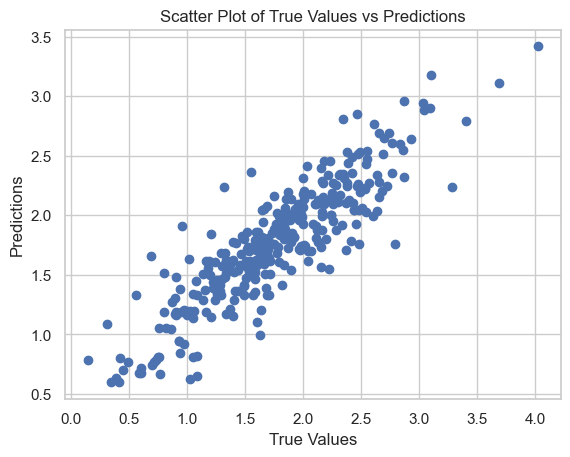

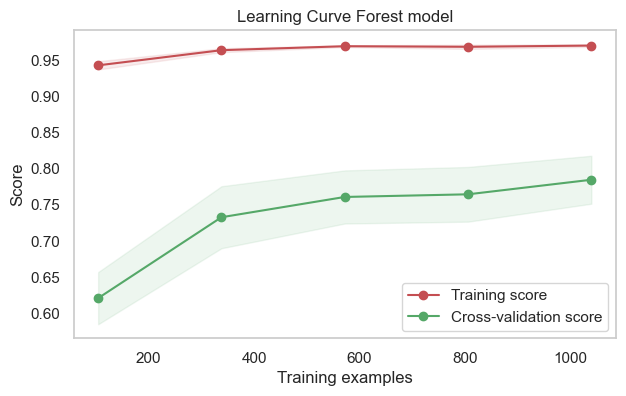

In [24]:
forest_model = Pipeline(steps=[
    ('prepa', preprocessor),
    ('forest', RandomForestRegressor(n_estimators=150, bootstrap=True, max_features=0.5, 
                                      min_samples_split=2, min_samples_leaf=1, random_state=1))
])
# Ensuite, vous pouvez utiliser ce pipeline pour ajuster votre modèle
forest_model.fit(X_train, y_train)

# Et également utiliser le pipeline pour faire des prédictions
predictions = forest_model.predict(X_test)
pipelines = {}
result_forest = evaluate_model(forest_model, 'forest', X, y, pipelines)
display(result_forest)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scatter Plot of True Values vs Predictions')
plt.show()
#display(result_forest, predictions)

plot_learning_curve(forest_model, "Learning Curve Forest model", X_train, y_train, cv=5)
plt.show()

Globalement, ces résultats montrent que le modèle RandomForest après le réglage des hyperparamètres  offre une amélioration légère  par rapport à la version précédente. Il démontre une bonne capacité de prédiction et une bonne généralisation aux données de test.

### AdaBoost
### HyperParametre:
n_estimators : Le nombre d'étapes de renforcement à effectuer. Il représente le nombre de faibles apprenants à former séquentiellement.  
learning_rate : Il réduit la contribution de chaque faible apprenant. Un taux d'apprentissage plus bas nécessite plus de faibles apprenants.  
base_estimator : L'estimateur de base à partir duquel l'ensemble renforcé est construit. La valeur par défaut est un arbre de décision avec une profondeur de 1 (DecisionTreeRegressor(max_depth=1)).  

In [25]:
# Instancier le modèle avec le préprocesseur dans le pipeline
ada_pipeline = Pipeline(steps=[
    ('prepa', preprocessor),
    ('ada', AdaBoostRegressor(random_state=42))
])

# Définir la grille des hyperparamètres à rechercher
param_grid_ada = {
    'ada__n_estimators': [50,60,70,80,90],# 90 -110
    'ada__learning_rate': [1,2,5],
    "ada__loss": ['linear', 'square', 'exponential'],
    "ada__random_state":[1,2,5]
}

grid_search = GridSearchCV(
    ada_pipeline, param_grid=param_grid_ada, 
    cv=7, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Prédire sur l'ensemble de test avec les meilleurs hyperparamètres
y_pred = grid_search.predict(X_test)

# Les performances du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE as the square root of MSE
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error : {mse}")
print(f"Root Mean Squared Error : {rmse}")
print(f"R2 : {r2}")

Meilleurs hyperparamètres :  {'ada__learning_rate': 5, 'ada__loss': 'exponential', 'ada__n_estimators': 90, 'ada__random_state': 2}
Mean Squared Error : 0.11699048609525795
Root Mean Squared Error : 0.3420387201696
R2 : 0.6983723855829944


,RMSE Train,RMSE Test,R2 Train,R2 Test,MAE Test,Fit Time Test,Score Time Test
0,0.299337,0.335851,0.766636,0.631219,0.265693,0.266217,0.013885


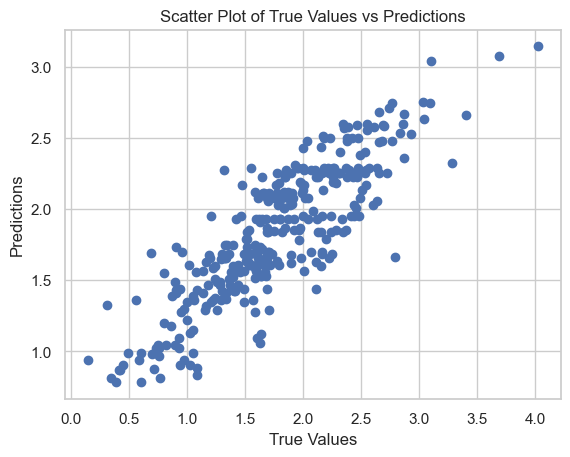

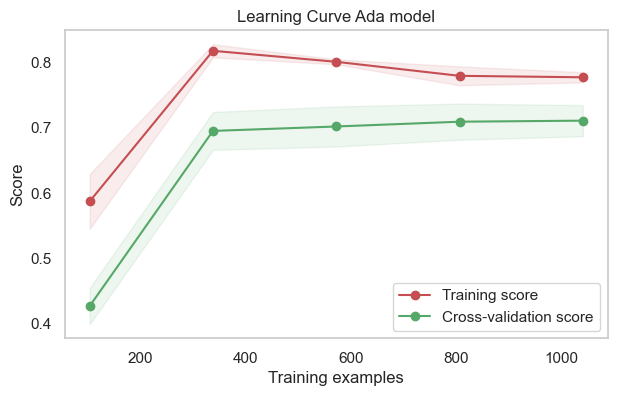

In [26]:
Ada_model = Pipeline([
    ('prepa', preprocessor),
    ('ada', AdaBoostRegressor(n_estimators=90, learning_rate=5,random_state=1, loss='exponential'))
])
# Ensuite, vous pouvez utiliser ce pipeline pour ajuster votre modèle
Ada_model.fit(X_train, y_train)

# Et également utiliser le pipeline pour faire des prédictions
predictions = Ada_model.predict(X_test)
pipelines = {}

result_Ada = evaluate_model(Ada_model, 'ada', X, y, pipelines)
display(result_Ada)

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scatter Plot of True Values vs Predictions')
plt.show()
#display(result_forest, predictions)

plot_learning_curve(Ada_model, "Learning Curve Ada model", X_train, y_train, cv=5)
plt.show()

Globalement, le tuning semble avoir légèrement amélioré les performances du modèle Adaboost en termes de précision et d'ajustement aux données d'entraînement, bien que les différences entre les performances avant et après le tuning soient relativement mineures.

## LightGBM


In [27]:
# Instancier le modèle avec le préprocesseur dans le pipeline
Lgbm_pipeline = Pipeline(steps=[
    ('prepa', preprocessor),
    ('Lgbm', lgb.LGBMRegressor())
])

# Définir la grille des hyperparamètres à rechercher
param_grid_Lgbm = {
    'Lgbm__n_estimators' :[80, 75,90,100, 110],
    'Lgbm__learning_rate':[0.1, 0.2, 0.3],
    'Lgbm__num_leaves':[15,20,25,30],
    'Lgbm__max_depth':[-1,0,1],
    'Lgbm__min_child_samples':[5, 8, 10, 12,15],
}

grid_search = GridSearchCV(
    Lgbm_pipeline, param_grid=param_grid_Lgbm, 
    cv=6, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Prédire sur l'ensemble de test avec les meilleurs hyperparamètres
y_pred = grid_search.predict(X_test)

# Les performances du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error : {mse}")
print(f"Root Mean Squared Error : {rmse}")
print(f"R2 : {r2}")

Meilleurs hyperparamètres :  {'Lgbm__learning_rate': 0.1, 'Lgbm__max_depth': -1, 'Lgbm__min_child_samples': 5, 'Lgbm__n_estimators': 90, 'Lgbm__num_leaves': 20}
Mean Squared Error : 0.08303428797528717
Root Mean Squared Error : 0.28815670732309384
R2 : 0.7859190517730851


,RMSE Train,RMSE Test,R2 Train,R2 Test,MAE Test,Fit Time Test,Score Time Test
0,0.165784,0.265418,0.928393,0.767436,0.198189,0.089154,0.005953


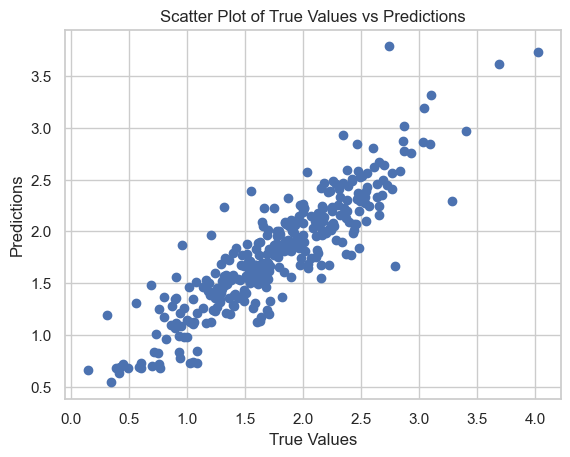

/Users/bahia/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/Users/bahia/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/Users/bahia/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or instal

<module 'matplotlib.pyplot' from '/Users/bahia/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

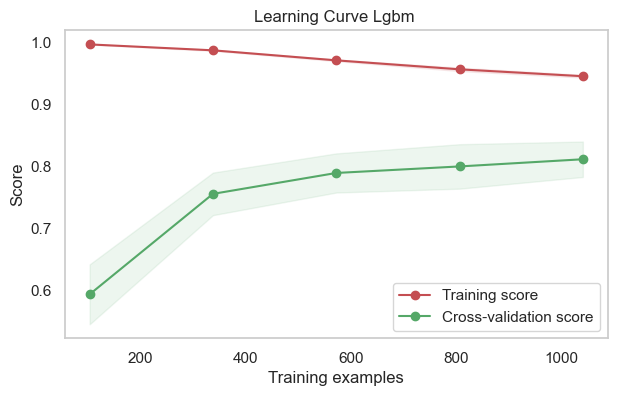

In [28]:

Lgbm_model =Pipeline([
    ('prepa', preprocessor),
    ('Lgbm', lgb.LGBMRegressor(learning_rate=0.1, max_depth=-1,n_estimators=90,num_leaves=15 , min_child_samples=5))
])
#  utiliser ce pipeline pour ajuster le modèle
Lgbm_model.fit(X_train, y_train)

#  utiliser le pipeline pour faire des prédictions
predictions = Lgbm_model.predict(X_test)
pipelines = {}

#Lgbm_model = lgb.LGBMRegressor(learning_rate=1, max_depth=21,n_estimators=67,num_leaves=21 , min_child_samples=33)
result_Lgbm = evaluate_model(Lgbm_model, 'Lgbm', X, y, pipelines)
display(result_Lgbm)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scatter Plot of True Values vs Predictions')
plt.show()
plot_learning_curve(Lgbm_model, "Learning Curve Lgbm ", X_train, y_train, cv=5)

Globalement, le modèle LGBM a montré une amélioration dans certains aspects après le tuning, notamment en termes de RMSE et de R2, mais aussi une augmentation significative du temps d'entraînement.

## Evaluation des models

In [29]:
final_df =[result_linear, result_forest, result_Ada, result_Lgbm]

# Concaténez-les verticalement
final_result_df = pd.concat(final_df, axis=0)

# Réinitialisez les index si nécessaire
final_result_df = final_result_df.reset_index(drop=True)

# Définissez les nouveaux index
final_result_df.index = ['linear', 'forest', 'ada', 'lgbm']

# Affichez le DataFrame résultant
display(final_result_df)

,RMSE Train,RMSE Test,R2 Train,R2 Test,MAE Test,Fit Time Test,Score Time Test
linear,0.305645,0.383392,0.756728,0.522040,0.288613,0.034284,0.004358
forest,0.103911,0.282254,0.971882,0.738370,0.209515,1.956486,0.013790
ada,0.299337,0.335851,0.766636,0.631219,0.265693,0.266217,0.013885
lgbm,0.165784,0.265418,0.928393,0.767436,0.198189,0.089154,0.005953


In [30]:
display(result_df)
display(final_result_df)

,RMSE Train,RMSE Test,R2 Train,R2 Test,Absolute,Fit Time,Score Time
linear,0.306177,0.376878,0.756012,0.529460,0.231917,0.032842,0.004225
forest,0.105631,0.288104,0.970947,0.729369,0.077577,2.277566,0.010815
adaboost,0.307703,0.336234,0.753578,0.631228,0.250427,0.193204,0.009771
Lgbm,0.124905,0.276879,0.959376,0.750455,0.092687,0.148662,0.005588
dum,0.620142,0.629835,0.000000,-0.302340,0.488475,0.008213,0.003829


,RMSE Train,RMSE Test,R2 Train,R2 Test,MAE Test,Fit Time Test,Score Time Test
linear,0.305645,0.383392,0.756728,0.522040,0.288613,0.034284,0.004358
forest,0.103911,0.282254,0.971882,0.738370,0.209515,1.956486,0.013790
ada,0.299337,0.335851,0.766636,0.631219,0.265693,0.266217,0.013885
lgbm,0.165784,0.265418,0.928393,0.767436,0.198189,0.089154,0.005953


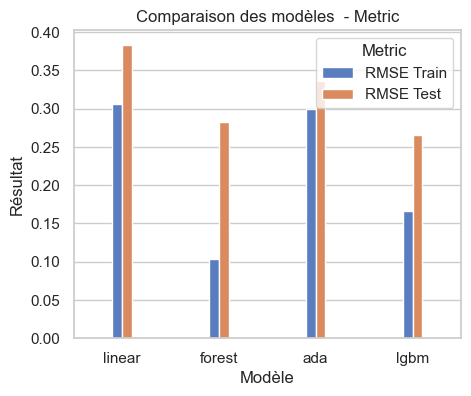

In [31]:
# Melt DataFrame pour regrouper les colonnes 'Score Time' et 'RMSE' en une seule colonne
melted_baseline = pd.melt(final_result_df.reset_index(), id_vars='index', value_vars=['RMSE Train', 'RMSE Test'],
                          var_name='Metric', value_name='Value')

# Renommer les colonnes pour plus de clarté
melted_baseline = melted_baseline.rename(columns={'index': 'Model'})
graph_melted(melted_baseline)


,index,R2 Train,R2 Test
0,linear,0.756728,0.522040
1,forest,0.971882,0.738370
2,ada,0.766636,0.631219
3,lgbm,0.928393,0.767436


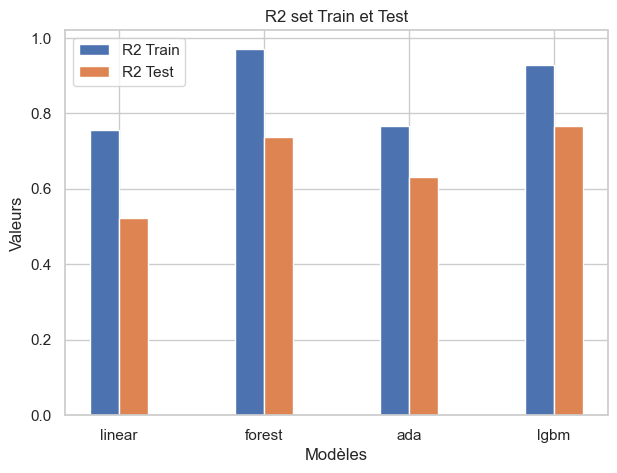

In [32]:
# Créer un DataFrame à partir des données
df_r2 = final_result_df.loc[:, ['R2 Train', 'R2 Test']]
df_r2 = df_r2.reset_index()
display(df_r2)


# Plot

width = 0.2  # Largeur des barres
x = np.arange(len(df_r2))  # Emplacements des barres

fig, ax = plt.subplots(figsize=(7, 5))
rects5 = ax.bar(x - width/2, df_r2['R2 Train'], width, label='R2 Train')
rects6 = ax.bar(x + width/2, df_r2['R2 Test'], width, label='R2 Test')


# Ajouter des étiquettes, des titres, etc.
ax.set_ylabel('Valeurs')
ax.set_xlabel('Modèles')
ax.set_title('R2 set Train et Test')
ax.set_xticks(x)
ax.set_xticklabels(df_r2['index'])
ax.legend()

plt.show()

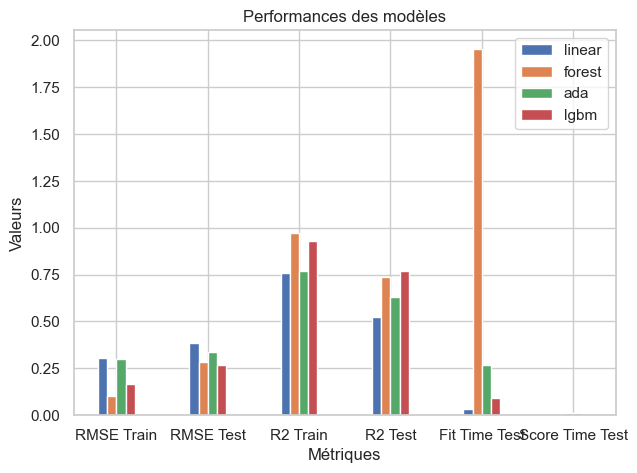

In [33]:
df_results = pd.DataFrame(final_result_df, columns=['RMSE Train', 'RMSE Test', 'R2 Train', 'R2 Test', 'Fit Time Test', 'Score Time Test'])

# Plot
width = 0.1  # Largeur des barres
x = np.arange(len(df_results.columns))  # Emplacements des barres

fig, ax = plt.subplots(figsize=(7, 5))

# Plot pour chaque modèle et chaque métrique
for i, model in enumerate(df_results.index):
    rects = ax.bar(x + width * i, df_results.loc[model], width, label=model)

# Ajouter des étiquettes, des titres, etc.
ax.set_ylabel('Valeurs')
ax.set_xlabel('Métriques')
ax.set_title('Performances des modèles')
ax.set_xticks(x + width * (len(df_results) - 1) / 2)
ax.set_xticklabels(df_results.columns)
ax.legend()

plt.show()

,index,Fit Time Test,Score Time Test
0,linear,0.034284,0.004358
1,forest,1.956486,0.013790
2,ada,0.266217,0.013885
3,lgbm,0.089154,0.005953


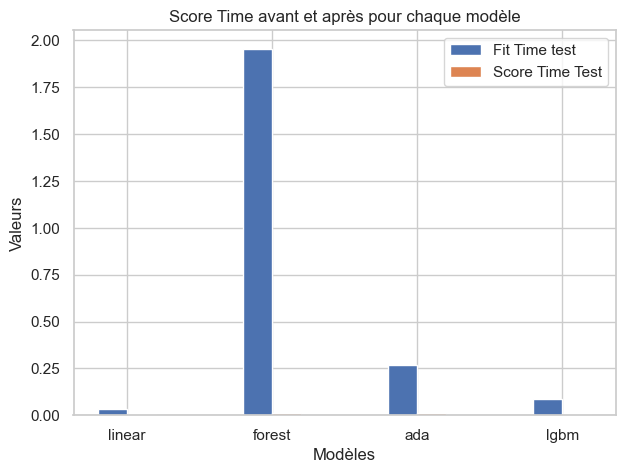

In [34]:
# Créer un DataFrame à partir des données
df_time = final_result_df.loc[:, ['Fit Time Test','Score Time Test']]
df_time = df_time.reset_index()
display(df_time)
# Plot

width = 0.2  # Largeur des barres
x = np.arange(len(df_time))  # Emplacements des barres

fig, ax = plt.subplots(figsize=(7, 5))
rects3 = ax.bar(x - width/2, df_time['Fit Time Test'], width,label='Fit Time test')
rects4 = ax.bar(x + width/2, df_time['Score Time Test'], width,  label='Score Time Test')

# Ajouter des étiquettes, des titres, etc.
ax.set_ylabel('Valeurs')
ax.set_xlabel('Modèles')
ax.set_title('Score Time avant et après pour chaque modèle')
ax.set_xticks(x)
ax.set_xticklabels(df_time['index'])
ax.legend()

plt.show()

En examinant les résultats avant et après le tuning des paramètres, ainsi que les performances initiales La question du choix du model sera entre RandomForest et Lgbm.
- Random Forest :

Avant le tuning : Bonnes performances initiales avec un R2 Test de 0.729369.  
Après le tuning : Amélioration significative du R2 Test (0.737253) et du RMSE Test (0.282839).  
Observations : Le modèle Random Forest semble être robuste et bénéficie d'améliorations après le tuning. Il peut être un choix solide en raison de sa capacité à gérer des ensembles de données complexes par contre le temps d'ajustement est relativement long.  

- LightGBM :

Avant le tuning : Performances initiales solides avec un R2 Test de 0.750455.
Après le tuning : Légère amélioration du RMSE Test (0.265418) et du R2 Test (0.767436).
Observations : LightGBM maintient de bonnes performances après le tuning et offre une efficacité de calcul élevée. Contrairement au Random forest le temps d'ajustement est beaucoup plus court.

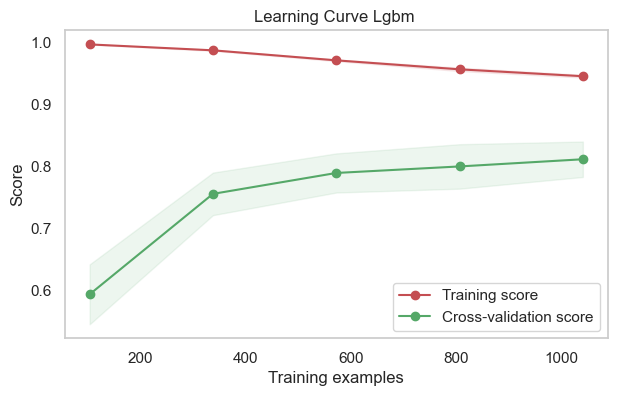

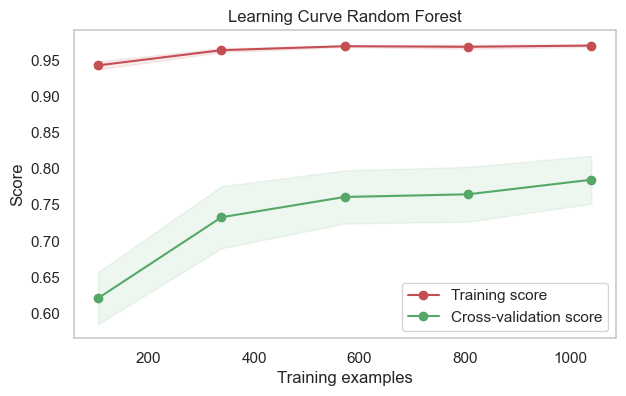

In [35]:
plot_learning_curve(Lgbm_model, "Learning Curve Lgbm ", X_train, y_train, cv=5)
plot_learning_curve(forest_model, "Learning Curve Random Forest", X_train, y_train, cv=5)
plt.show()

# Importance des variables explicatives

SHAP offre une compréhension approfondie des influences des caractéristiques sur les prédictions du modèle, tant au niveau global qu'au niveau local.  
Importance Globale des Caractéristiques : On peut voir quelle caractéristique a généralement le plus d'impact sur les prédictions du modèle.  

Importance Locale des Caractéristiques : Pour une prédiction spécifique, on peut savoir comment chaque caractéristique a contribué à cette prédiction, expliquant ainsi pourquoi le modèle a donné une certaine réponse pour un exemple particulier.
 


Feature names: Index(['NumberofFloors', 'BuildingAge', 'NumberofBuildings',
       'percent_electricity', 'LargestPropertyUseTypeGFA_rate',
       'SecondLargestPropertyUseTypeGFA_rate',
       'ThirdLargestPropertyUseTypeGFA_rate', 'PropertyGFAParking_rate',
       'PrimaryPropertyType', 'Neighborhood', 'NumberOfAllUseTypes',
       'GFAPerBuilding', 'GFAPerFloor', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType'],
      dtype='object')
Number of features in shap_values: (326, 164) 
 Number of features in X test transformed: (326, 164) 
Number of features in dense data: (326, 164) 
Number of features in X_test: (326, 16)


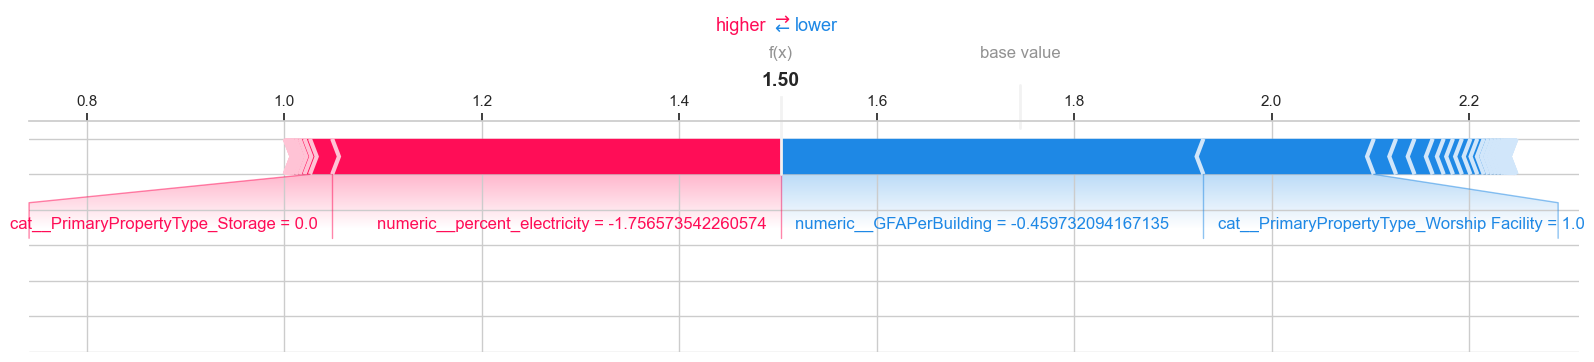

In [36]:
import matplotlib
shap.initjs()
explainer = shap.TreeExplainer(Lgbm_model.named_steps['Lgbm'] )
X_test_tranformed = Lgbm_model.named_steps['prepa'].transform(X_test)
dense_data = X_test_tranformed.toarray()
shap_values= explainer.shap_values(dense_data)


#print("Number of features in X_test:", len(X_test.columns))
print("Feature names:", X_test.columns)
print("Number of features in shap_values:",shap_values.shape, "\n Number of features in X test transformed:",X_test_tranformed.shape, 
      "\nNumber of features in dense data:",dense_data.shape, "\nNumber of features in X_test:", X_test.shape )
# # plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value, shap_values[0,:], dense_data[0, :], feature_names=preprocessor.get_feature_names_out(),matplotlib=matplotlib)



(326, 164)


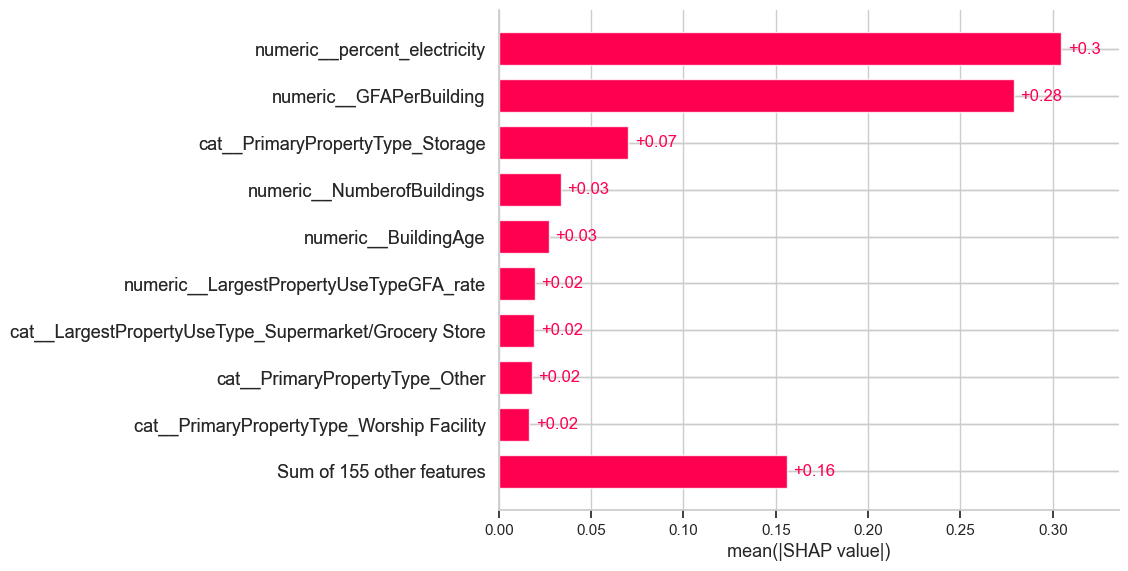

In [37]:
shap.initjs()
explainer = shap.Explainer(Lgbm_model.named_steps['Lgbm'])
X_test_transformed = Lgbm_model.named_steps['prepa'].transform(X_test)
dense_data = X_test_transformed.toarray()
shap_values = explainer.shap_values(dense_data)

# Créez un objet Explanation
explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=dense_data, feature_names=preprocessor.get_feature_names_out())
print(explanation.shape)
# Utilisez shap.plots.waterfall avec l'objet Explanation
shap.plots.bar(explanation, max_display=10)

In [38]:
X_test.shape

(326, 16)

(326, 164)


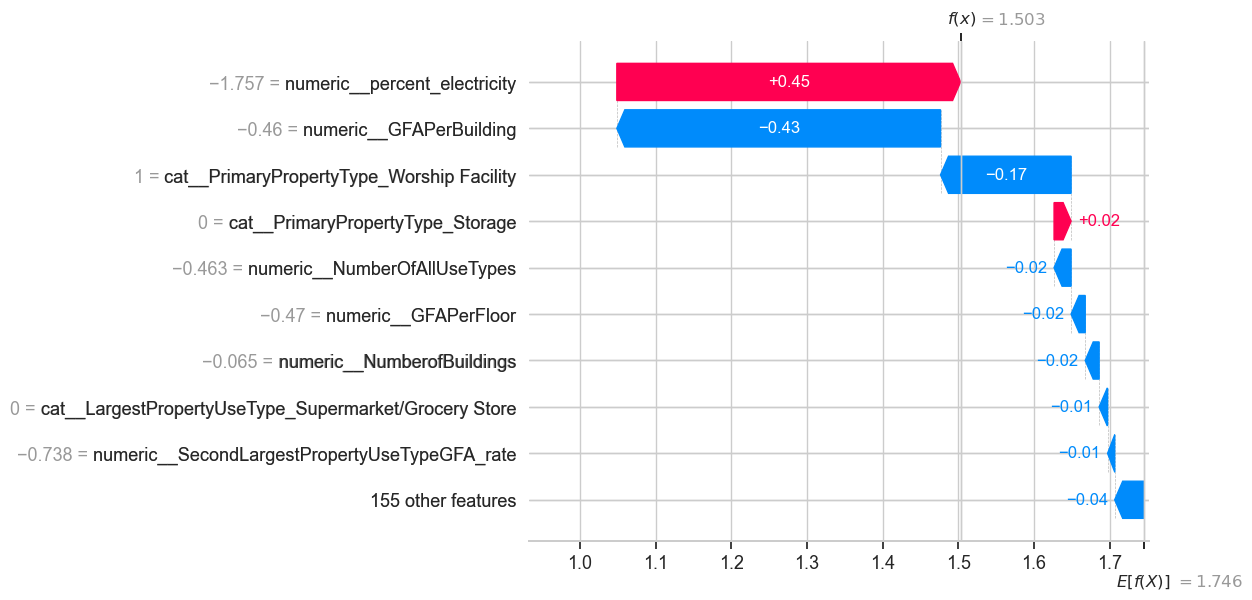

In [39]:
shap.initjs()
explainer =shap.TreeExplainer(Lgbm_model.named_steps['Lgbm'])
X_test_tranformed = Lgbm_model.named_steps['prepa'].transform(X_test)
dense_data = X_test_tranformed.toarray()
shap_values = explainer.shap_values(dense_data)
explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=dense_data,feature_names=preprocessor.get_feature_names_out())
print(explanation.shape)
shap.plots.waterfall(explanation[0])

fournit une explication visuelle de la contribution de chaque caractéristique à la prédiction du modèle pour un exemple spécifique. Les barres rouges ou bleues indiquent la direction de l'effet, tandis que la longueur de la barre quantifie l'ampleur de la contribution.

# EnergyStar importance

Intégration de l'"ENERGY STAR Score" dans la modélisation des émissions.  
Les tests seront effectués avec l'algorithme LGBM, sélectionné pour sa performance 

 L'objectif est d'analyser comment l'ajout de cet indicateur pourrait enrichir nos prédictions et mieux cerner les tendances énergétiques des bâtiments.

In [40]:
data = data2[[ 'ENERGYSTARScore', "NumberofFloors",  "BuildingAge" ,"NumberofBuildings",
                "percent_electricity",
              "LargestPropertyUseTypeGFA_rate","SecondLargestPropertyUseTypeGFA_rate" ,"ThirdLargestPropertyUseTypeGFA_rate",  
              "PropertyGFAParking_rate",
              'TotalGHGEmissionsLog',  "PrimaryPropertyType",
             "Neighborhood" ,"NumberOfAllUseTypes",'GFAPerBuilding','GFAPerFloor',
             'LargestPropertyUseType',"SecondLargestPropertyUseType", "ThirdLargestPropertyUseType"]]
model_dataES= data
model_dataES.dropna(how = 'any', inplace=True)
X = model_dataES.drop(['TotalGHGEmissionsLog'],axis=1) #TotalGHGEmissions
y = model_dataES['TotalGHGEmissionsLog']
model_dataES


,ENERGYSTARScore,NumberofFloors,BuildingAge,NumberofBuildings,percent_electricity,LargestPropertyUseTypeGFA_rate,SecondLargestPropertyUseTypeGFA_rate,ThirdLargestPropertyUseTypeGFA_rate,PropertyGFAParking_rate,TotalGHGEmissionsLog,PrimaryPropertyType,Neighborhood,NumberOfAllUseTypes,GFAPerBuilding,GFAPerFloor,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
0,60.0,12,89,1.0,54.605997,100.00,0.00,0.00,0.00,2.399639,Hospitality,DOWNTOWN,5,88434.0,7369.500,Hotel,no information,no information
1,61.0,11,20,1.0,38.660907,80.99,14.55,4.46,14.55,2.472552,Hospitality,DOWNTOWN,26,103566.0,9415.091,Hotel,Parking,Restaurant
2,43.0,41,47,1.0,68.230746,79.12,0.00,0.00,20.57,3.320204,Hospitality,DOWNTOWN,5,956110.0,23319.756,Hotel,no information,no information
3,56.0,10,90,1.0,40.751933,100.00,0.00,0.00,0.00,2.458532,Hospitality,DOWNTOWN,5,61320.0,6132.000,Hotel,no information,no information
4,75.0,18,36,1.0,37.880171,70.31,38.73,0.00,35.31,2.704159,Hospitality,DOWNTOWN,29,175580.0,9754.444,Hotel,Parking,Swimming Pool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,9.0,2,87,1.0,49.020597,100.00,0.00,0.00,0.00,2.132900,Office,GREATER DUWAMISH,6,24990.0,12495.000,Office,no information,no information
1614,77.0,3,1,1.0,100.000000,101.62,0.00,0.00,0.00,1.010300,Education,GREATER DUWAMISH,20,45000.0,15000.000,K-12 School,Parking,no information
1623,75.0,1,64,1.0,100.000000,100.00,0.00,0.00,0.00,0.653213,Office,MAGNOLIA / QUEEN ANNE,6,13661.0,13661.000,Office,no information,no information
1626,93.0,1,56,1.0,71.565189,100.00,0.00,0.00,0.00,0.943989,Office,SOUTHEAST,6,15398.0,15398.000,Office,no information,no information


In [41]:

Lgbm_model_ES2 =Pipeline([
    ('prepa', preprocessor),
    ('Lgbm', lgb.LGBMRegressor(learning_rate=0.1, max_depth=-1,n_estimators=75,num_leaves=25 , min_child_samples=5))
])
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,test_size=0.2,random_state=0)
# Ensuite, vous pouvez utiliser ce pipeline pour ajuster votre modèle
Lgbm_model_ES2.fit(X_train2, y_train2)

# Et également utiliser le pipeline pour faire des prédictions
predictions = Lgbm_model_ES2.predict(X_test2, predict_disable_shape_check=True)
pipelines = {}
display(X_test2)
#Lgbm_model = lgb.LGBMRegressor(learning_rate=1, max_depth=21,n_estimators=67,num_leaves=21 , min_child_samples=33)
result_Lgbm_ES = evaluate_model(Lgbm_model_ES2, 'Lgbm', X, y, pipelines)
display(result_Lgbm_ES)

,ENERGYSTARScore,NumberofFloors,BuildingAge,NumberofBuildings,percent_electricity,LargestPropertyUseTypeGFA_rate,SecondLargestPropertyUseTypeGFA_rate,ThirdLargestPropertyUseTypeGFA_rate,PropertyGFAParking_rate,PrimaryPropertyType,Neighborhood,NumberOfAllUseTypes,GFAPerBuilding,GFAPerFloor,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
318,96.0,6,12,1.0,100.000000,57.00,37.75,2.17,37.75,Office,LAKE UNION,54,139282.0,23213.667,Office,Parking,Financial Office
1512,1.0,1,45,1.0,80.342442,100.00,0.00,0.00,0.00,Storage,GREATER DUWAMISH,28,28320.0,28320.000,Distribution Center,Parking,no information
1028,92.0,2,92,1.0,18.050205,49.81,0.00,0.00,0.00,Education,DELRIDGE,11,42975.0,21487.500,K-12 School,no information,no information
656,95.0,2,87,1.0,70.351067,100.00,0.00,0.00,0.00,Office,DOWNTOWN,6,20028.0,10014.000,Office,no information,no information
773,49.0,3,28,1.0,52.220095,100.00,0.00,0.00,0.00,Residential,LAKE UNION,24,21118.0,7039.333,Residence Hall/Dormitory,no information,no information
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,92.0,2,91,1.0,36.826879,130.97,0.00,0.00,0.00,Education,CENTRAL,11,37327.0,18663.500,K-12 School,no information,no information
880,92.0,4,9,1.0,48.311246,64.39,33.05,0.00,38.08,Office,LAKE UNION,15,64596.0,16149.000,Office,Parking,no information
925,84.0,2,34,1.0,100.000000,98.73,0.00,0.00,0.00,Office,GREATER DUWAMISH,6,41262.0,20631.000,Office,no information,no information
724,94.0,6,107,1.0,29.905711,100.00,0.00,0.00,0.00,Hospitality,DOWNTOWN,5,35820.0,5970.000,Hotel,no information,no information


,RMSE Train,RMSE Test,R2 Train,R2 Test,MAE Test,Fit Time Test,Score Time Test
0,0.062738,0.199144,0.989237,0.854802,0.140067,0.157828,0.006193


(216, 114)


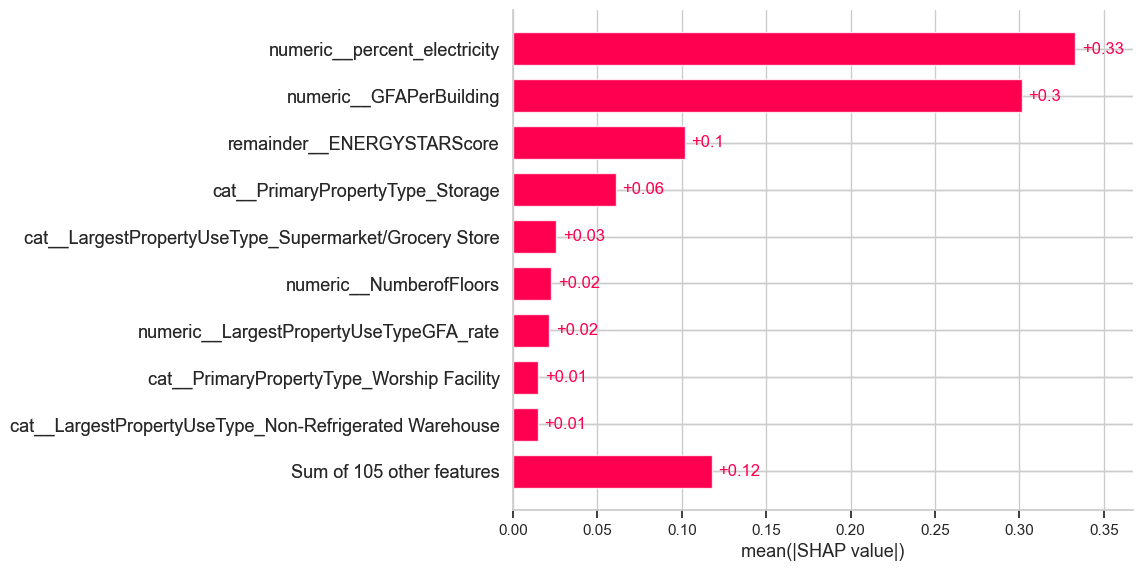

In [42]:
shap.initjs()

explainer = shap.Explainer(Lgbm_model_ES2.named_steps['Lgbm'])
X_test_transformed = Lgbm_model_ES2.named_steps['prepa'].transform(X_test2)
dense_data = X_test_transformed.toarray()
shap_values = explainer.shap_values(dense_data)
#display(preprocessor.get_feature_names_out())
# Créez un objet Explanation
explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=dense_data, feature_names=preprocessor.get_feature_names_out())
print(explanation.shape)
# Utilisez shap.plots.waterfall avec l'objet Explanation
shap.plots.bar(explanation, max_display=10
               )


In [43]:
model_dataES_comp= model_dataES
model_dataES_comp=model_dataES_comp.drop(['ENERGYSTARScore'],axis=1)

#model_dataES.dropna(how = 'any', inplace=True)
X = model_dataES_comp.drop(['TotalGHGEmissionsLog'],axis=1) #TotalGHGEmissions
y = model_dataES_comp['TotalGHGEmissionsLog']
model_dataES_comp

,NumberofFloors,BuildingAge,NumberofBuildings,percent_electricity,LargestPropertyUseTypeGFA_rate,SecondLargestPropertyUseTypeGFA_rate,ThirdLargestPropertyUseTypeGFA_rate,PropertyGFAParking_rate,TotalGHGEmissionsLog,PrimaryPropertyType,Neighborhood,NumberOfAllUseTypes,GFAPerBuilding,GFAPerFloor,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
0,12,89,1.0,54.605997,100.00,0.00,0.00,0.00,2.399639,Hospitality,DOWNTOWN,5,88434.0,7369.500,Hotel,no information,no information
1,11,20,1.0,38.660907,80.99,14.55,4.46,14.55,2.472552,Hospitality,DOWNTOWN,26,103566.0,9415.091,Hotel,Parking,Restaurant
2,41,47,1.0,68.230746,79.12,0.00,0.00,20.57,3.320204,Hospitality,DOWNTOWN,5,956110.0,23319.756,Hotel,no information,no information
3,10,90,1.0,40.751933,100.00,0.00,0.00,0.00,2.458532,Hospitality,DOWNTOWN,5,61320.0,6132.000,Hotel,no information,no information
4,18,36,1.0,37.880171,70.31,38.73,0.00,35.31,2.704159,Hospitality,DOWNTOWN,29,175580.0,9754.444,Hotel,Parking,Swimming Pool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,2,87,1.0,49.020597,100.00,0.00,0.00,0.00,2.132900,Office,GREATER DUWAMISH,6,24990.0,12495.000,Office,no information,no information
1614,3,1,1.0,100.000000,101.62,0.00,0.00,0.00,1.010300,Education,GREATER DUWAMISH,20,45000.0,15000.000,K-12 School,Parking,no information
1623,1,64,1.0,100.000000,100.00,0.00,0.00,0.00,0.653213,Office,MAGNOLIA / QUEEN ANNE,6,13661.0,13661.000,Office,no information,no information
1626,1,56,1.0,71.565189,100.00,0.00,0.00,0.00,0.943989,Office,SOUTHEAST,6,15398.0,15398.000,Office,no information,no information


In [44]:
Lgbm_model_ES2_comp =Pipeline([
    ('prepa', preprocessor),
    ('Lgbm', lgb.LGBMRegressor(learning_rate=0.1, max_depth=-1,n_estimators=75,num_leaves=25 , min_child_samples=5))
])
X_train_comp, X_test_comp, y_train_comp, y_test_comp = train_test_split(X, y,test_size=0.2,random_state=0)
# Ensuite, vous pouvez utiliser ce pipeline pour ajuster votre modèle
Lgbm_model_ES2_comp.fit(X_train_comp, y_train_comp)

# Et également utiliser le pipeline pour faire des prédictions
predictions = Lgbm_model_ES2_comp.predict(X_test_comp, predict_disable_shape_check=True)
pipelines = {}
display(X_test_comp)
#Lgbm_model = lgb.LGBMRegressor(learning_rate=1, max_depth=21,n_estimators=67,num_leaves=21 , min_child_samples=33)
result_Lgbm_ES_comp = evaluate_model(Lgbm_model_ES2_comp, 'Lgbm', X, y, pipelines)
display(result_Lgbm_ES_comp)

,NumberofFloors,BuildingAge,NumberofBuildings,percent_electricity,LargestPropertyUseTypeGFA_rate,SecondLargestPropertyUseTypeGFA_rate,ThirdLargestPropertyUseTypeGFA_rate,PropertyGFAParking_rate,PrimaryPropertyType,Neighborhood,NumberOfAllUseTypes,GFAPerBuilding,GFAPerFloor,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
318,6,12,1.0,100.000000,57.00,37.75,2.17,37.75,Office,LAKE UNION,54,139282.0,23213.667,Office,Parking,Financial Office
1512,1,45,1.0,80.342442,100.00,0.00,0.00,0.00,Storage,GREATER DUWAMISH,28,28320.0,28320.000,Distribution Center,Parking,no information
1028,2,92,1.0,18.050205,49.81,0.00,0.00,0.00,Education,DELRIDGE,11,42975.0,21487.500,K-12 School,no information,no information
656,2,87,1.0,70.351067,100.00,0.00,0.00,0.00,Office,DOWNTOWN,6,20028.0,10014.000,Office,no information,no information
773,3,28,1.0,52.220095,100.00,0.00,0.00,0.00,Residential,LAKE UNION,24,21118.0,7039.333,Residence Hall/Dormitory,no information,no information
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,2,91,1.0,36.826879,130.97,0.00,0.00,0.00,Education,CENTRAL,11,37327.0,18663.500,K-12 School,no information,no information
880,4,9,1.0,48.311246,64.39,33.05,0.00,38.08,Office,LAKE UNION,15,64596.0,16149.000,Office,Parking,no information
925,2,34,1.0,100.000000,98.73,0.00,0.00,0.00,Office,GREATER DUWAMISH,6,41262.0,20631.000,Office,no information,no information
724,6,107,1.0,29.905711,100.00,0.00,0.00,0.00,Hospitality,DOWNTOWN,5,35820.0,5970.000,Hotel,no information,no information


,RMSE Train,RMSE Test,R2 Train,R2 Test,MAE Test,Fit Time Test,Score Time Test
0,0.097716,0.242793,0.973857,0.784811,0.179121,0.140474,0.008956


En comparant les performances du modèle avec et sans l'inclusion de l'ENERGY STAR Score, on remarque une nette amélioration des métriques telles que le RMSE Test et le R2 Test lorsque le score est pris en compte. Cela suggère que l'ENERGY STAR Score contribue de manière significative à la prédiction des émissions.

Cependant, il faut considérer le coût associé au calcul de l'ENERGY STAR Score. Si ce coût est prohibitif ou dépasse les ressources disponibles, il pourrait ne pas être viable de l'inclure dans le processus de modélisation.

En conclusion, si les ressources le permettent, l'inclusion de l'ENERGY STAR Score semble bénéfique pour améliorer les performances du modèle. Dans le cas contraire, il serait judicieux d'explorer des alternatives plus économiques .